<a href="https://colab.research.google.com/github/JuanM-GG/maestria/blob/main/mecanistico-optimizacion-lote-alimentado/inhibicion_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar modulos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def euler(f, x0, t0, tf, dt, u, *kargs):

    """
    Solve a system of differential equations using the Euler method.
    
    Parameters:
    f (function): The derivative function.
    x0 (ndarray): The initial state.
    t0 (float): The initial time.
    tf (float): The final time.
    dt (float): The time step.
    u (function): The input function.
    
    Returns:
    ndarray: The state at each time step.
    """
    t = np.arange(t0, tf, dt)
    x = np.zeros((len(t), len(x0)))
    x[0, :] = x0
    for i in range(1, len(t)):
        # print(x[i,:])
        x[i, :] = x[i-1, :] + dt * f(x[i-1, :], t[i-1], u(t[i-1]), *kargs)
    return x


In [3]:
# Definir modelo de inhibicion por sustrato
def inhibition_model(y, t, u, mu_max, yxs, ks, ypx, ki, sf):
                         # mu_max, yxs, ks, ypx, ki, sf
    F = u

    x, s, V = y

    # This is the part that will be sustituted by an ANN likely
    growth_rate = mu_max*(s/(ks+s+ki*s**2))

    # Mass balances 
    dx = growth_rate*x - F*x/V
    ds = F/V*(sf-s) -1/yxs*growth_rate*x
    dV = F
    # dp = ypx*growth_rate*x 

    return np.array([dx, ds, dV])

In [38]:
def inflow_rate(t):

    return 1

In [39]:
# Parameters
mu_max = 1.20
yxs = 0.2
ks = 280
ypx = 4
ki = 0.3
sf = 50

In [52]:
# Initial conditions
x0 = np.array([0.2, 40, 10])

# Integration time
tf = 100
dt = 0.1
time = np.arange(0, tf, dt)

# Solve the ODEs
x, s, V = euler(inhibition_model, x0, 0, tf, dt, inflow_rate, mu_max, yxs, ks, ypx, ki, sf).T

[]

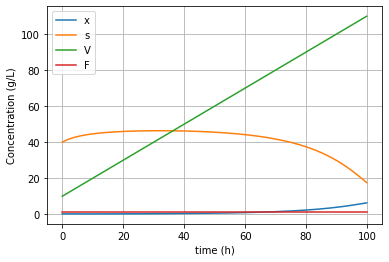

In [53]:
plt.plot(time, x, label='x')
plt.plot(time, s, label ='s')
plt.plot(time, V, label = 'V')
plt.plot(time, [inflow_rate(t) for t in time], label='F')
plt.xlabel('time (h)')
plt.ylabel('Concentration (g/L)')
plt.grid()
plt.legend()
plt.plot()

In [57]:
def fitness_function(u):
    x, s, V = euler(inhibition_model, x0, 0, tf, dt, lambda t: u, mu_max, yxs, ks, ypx, ki, sf).T
    return x[-1]*V[-1]

In [62]:
u = np.arange(0, 3, 0.1)
fitness_values = [fitness_function(u_val) for u_val in u]

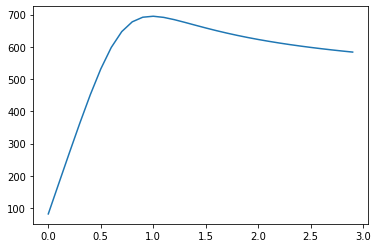

In [63]:
plt.plot(u, fitness_values)